In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from matplotlib import pyplot as plt
from sqlalchemy import create_engine
from bin.utils import iterate_fasta

%config InlineBackend.figure_format = 'retina'

In [21]:
example = pd.read_csv('/Users/prihodad/Downloads/example.csv', index_col=0)
example.index = list('QVQLQESGPELVKPGASMKISCKASGYSFTEHIINWVKQTHRENLEWIGLINPNSGGTNYNQKFKDKATLTVDTASNTAYMELLSLTSEDSAVYYCARLRYDAAYWGQGTTVTVSS')
example.head()

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
Q,0.003110,0.004214,0.004722,0.017732,0.004137,0.004527,0.005019,0.003322,0.004546,0.004399,0.003443,0.003433,0.004356,0.892610,0.003842,0.004297,0.003782,0.003860,0.003771,0.003953
V,0.007671,0.003262,0.006324,0.004786,0.004107,0.005905,0.003558,0.006380,0.003150,0.006822,0.006430,0.003542,0.002909,0.002682,0.003055,0.003080,0.003096,0.900884,0.003739,0.003463
Q,0.003447,0.003825,0.003651,0.004500,0.003641,0.003486,0.010721,0.003636,0.004868,0.006132,0.004100,0.003987,0.005651,0.895058,0.007048,0.003081,0.003661,0.003116,0.004127,0.003978
L,0.003679,0.004326,0.003487,0.003393,0.003730,0.003202,0.003356,0.003195,0.003627,0.913381,0.004145,0.003425,0.003414,0.003611,0.003898,0.003151,0.003454,0.005812,0.003922,0.002938
Q,0.010774,0.004267,0.005057,0.013435,0.006370,0.010978,0.006694,0.007189,0.004389,0.020507,0.027635,0.003593,0.004801,0.018766,0.004606,0.003711,0.004933,0.810821,0.005291,0.003879


In [46]:
numbers = example.T.reset_index(drop=True).T
numbers = numbers.apply(lambda row: pd.Series(row.sort_values(ascending=False).values, row.index), axis=1)
numbers.columns = numbers.columns + 1
numbers.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Q,0.892610,0.017732,0.005019,0.004722,0.004546,0.004527,0.004399,0.004356,0.004297,0.004214,0.004137,0.003953,0.003860,0.003842,0.003782,0.003771,0.003443,0.003433,0.003322,0.003110
V,0.900884,0.007671,0.006822,0.006430,0.006380,0.006324,0.005905,0.004786,0.004107,0.003739,0.003558,0.003542,0.003463,0.003262,0.003150,0.003096,0.003080,0.003055,0.002909,0.002682
Q,0.895058,0.010721,0.007048,0.006132,0.005651,0.004868,0.004500,0.004127,0.004100,0.003987,0.003978,0.003825,0.003661,0.003651,0.003641,0.003636,0.003486,0.003447,0.003116,0.003081
L,0.913381,0.005812,0.004326,0.004145,0.003922,0.003898,0.003730,0.003679,0.003627,0.003611,0.003487,0.003454,0.003425,0.003414,0.003393,0.003356,0.003202,0.003195,0.003151,0.002938
Q,0.810821,0.027635,0.020507,0.018766,0.013435,0.010978,0.010774,0.007189,0.006694,0.006370,0.005291,0.005057,0.004933,0.004801,0.004606,0.004389,0.004267,0.003879,0.003711,0.003593


In [86]:
annot = example.apply(lambda row: (row.sort_values(ascending=False).index + '\n' + row.sort_values(ascending=False).apply('{:.1%}'.format)).reset_index(drop=True), axis=1)
annot.columns = annot.columns + 1
annot.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Q,Q\n89.3%,E\n1.8%,H\n0.5%,D\n0.5%,K\n0.5%,G\n0.5%,L\n0.4%,P\n0.4%,S\n0.4%,C\n0.4%,F\n0.4%,Y\n0.4%,V\n0.4%,R\n0.4%,T\n0.4%,W\n0.4%,M\n0.3%,N\n0.3%,I\n0.3%,A\n0.3%
V,V\n90.1%,A\n0.8%,L\n0.7%,M\n0.6%,I\n0.6%,D\n0.6%,G\n0.6%,E\n0.5%,F\n0.4%,W\n0.4%,H\n0.4%,N\n0.4%,Y\n0.3%,C\n0.3%,K\n0.3%,T\n0.3%,S\n0.3%,R\n0.3%,P\n0.3%,Q\n0.3%
Q,Q\n89.5%,H\n1.1%,R\n0.7%,L\n0.6%,P\n0.6%,K\n0.5%,E\n0.4%,W\n0.4%,M\n0.4%,N\n0.4%,Y\n0.4%,C\n0.4%,T\n0.4%,D\n0.4%,F\n0.4%,I\n0.4%,G\n0.3%,A\n0.3%,V\n0.3%,S\n0.3%
L,L\n91.3%,V\n0.6%,C\n0.4%,M\n0.4%,W\n0.4%,R\n0.4%,F\n0.4%,A\n0.4%,K\n0.4%,Q\n0.4%,D\n0.3%,T\n0.3%,N\n0.3%,P\n0.3%,E\n0.3%,H\n0.3%,G\n0.3%,I\n0.3%,S\n0.3%,Y\n0.3%
Q,V\n81.1%,M\n2.8%,L\n2.1%,Q\n1.9%,E\n1.3%,G\n1.1%,A\n1.1%,I\n0.7%,H\n0.7%,F\n0.6%,W\n0.5%,D\n0.5%,T\n0.5%,P\n0.5%,R\n0.5%,K\n0.4%,C\n0.4%,Y\n0.4%,S\n0.4%,N\n0.4%


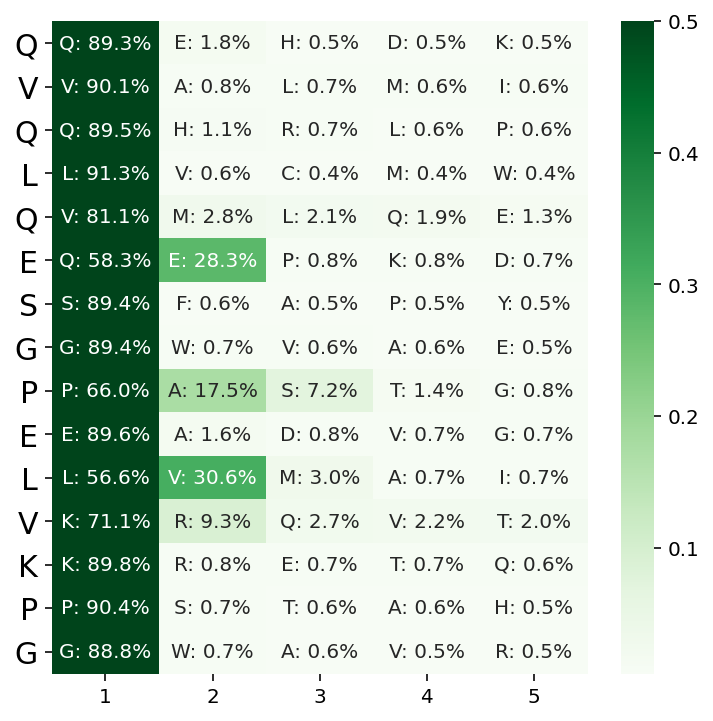

In [61]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(numbers.iloc[:15,:5], annot=annot.iloc[:15,:5], fmt='s', ax=ax, robust=True, vmax=0.5, cmap='Greens');
plt.yticks(rotation=0, fontsize=15);

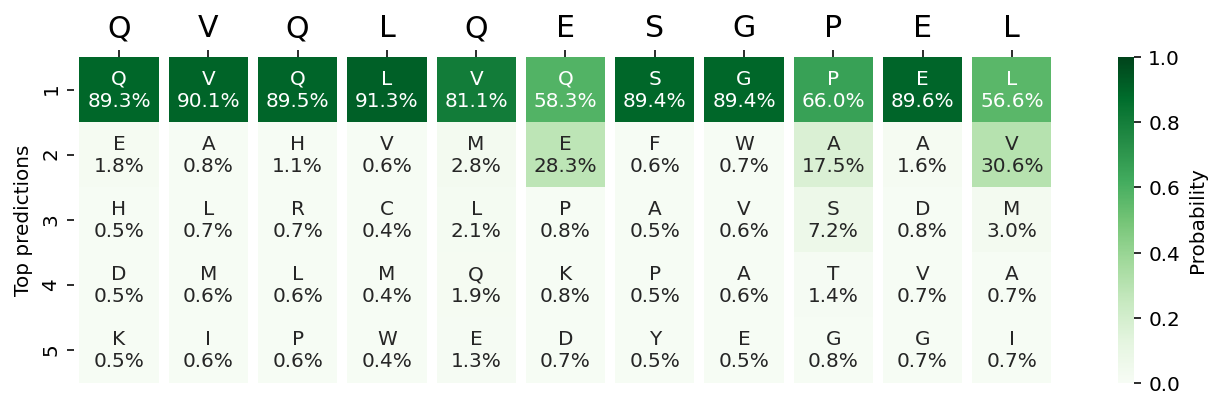

In [113]:
fig, ax = plt.subplots(figsize=(11, 3))
sns.heatmap(numbers.iloc[:11,:5].T, annot=annot.iloc[:11,:5].T, fmt='s', ax=ax, robust=True, vmax=1, vmin=0, cmap='Greens', cbar_kws={'label': 'Probability'});
for i in range(12):
    ax.axvline(i, color='white', lw=5)
ax.set_ylabel('Top predictions');
ax.xaxis.tick_top()
plt.xticks(rotation=0, fontsize=15);

In [78]:
example2 = pd.read_csv('/Users/prihodad/Downloads/example2.csv', index_col=0)
example2.index = list('QVQLQESG?ELVKPGASMKISCKASGYSFTEHIINWVKQTHRENLEWIGLINPNSGGTNYNQKFKDKATLTVDTASNTAYMELLSLTSEDSAVYYCARLRYDAAYWGQGTTVTVSS')
example2.head()

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
Q,0.003087,0.004200,0.004672,0.016722,0.004088,0.004413,0.004951,0.003337,0.004531,0.004379,0.003469,0.003429,0.004367,0.894103,0.003789,0.004250,0.003746,0.003823,0.003734,0.003945
V,0.007911,0.003416,0.006224,0.004977,0.004273,0.006233,0.003665,0.005554,0.003280,0.006993,0.006624,0.003579,0.003073,0.002785,0.003147,0.003086,0.003099,0.898652,0.003892,0.003602
Q,0.003433,0.003812,0.003651,0.004519,0.003626,0.003489,0.010968,0.003622,0.004920,0.006186,0.004083,0.003971,0.005706,0.894705,0.007075,0.003074,0.003667,0.003140,0.004104,0.003972
L,0.003696,0.004403,0.003471,0.003424,0.003848,0.003201,0.003320,0.003186,0.003642,0.912898,0.004153,0.003412,0.003434,0.003628,0.003977,0.003151,0.003455,0.005937,0.003945,0.002926
Q,0.010397,0.004156,0.004903,0.012213,0.006179,0.010844,0.006349,0.006860,0.004176,0.019050,0.024191,0.003477,0.004631,0.015346,0.004370,0.003587,0.004655,0.824085,0.004953,0.003787


In [79]:
numbers2 = example2.T.reset_index(drop=True).T
numbers2 = numbers2.apply(lambda row: pd.Series(row.sort_values(ascending=False).values, row.index), axis=1)
numbers2.columns = numbers2.columns + 1
numbers2.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Q,0.894103,0.016722,0.004951,0.004672,0.004531,0.004413,0.004379,0.004367,0.004250,0.004200,0.004088,0.003945,0.003823,0.003789,0.003746,0.003734,0.003469,0.003429,0.003337,0.003087
V,0.898652,0.007911,0.006993,0.006624,0.006233,0.006224,0.005554,0.004977,0.004273,0.003892,0.003665,0.003602,0.003579,0.003416,0.003280,0.003147,0.003099,0.003086,0.003073,0.002785
Q,0.894705,0.010968,0.007075,0.006186,0.005706,0.004920,0.004519,0.004104,0.004083,0.003972,0.003971,0.003812,0.003667,0.003651,0.003626,0.003622,0.003489,0.003433,0.003140,0.003074
L,0.912898,0.005937,0.004403,0.004153,0.003977,0.003945,0.003848,0.003696,0.003642,0.003628,0.003471,0.003455,0.003434,0.003424,0.003412,0.003320,0.003201,0.003186,0.003151,0.002926
Q,0.824085,0.024191,0.019050,0.015346,0.012213,0.010844,0.010397,0.006860,0.006349,0.006179,0.004953,0.004903,0.004655,0.004631,0.004370,0.004176,0.004156,0.003787,0.003587,0.003477


In [90]:
annot2 = example2.apply(lambda row: (row.sort_values(ascending=False).index + '\n' + row.sort_values(ascending=False).apply('{:.1%}'.format)).reset_index(drop=True), axis=1)
annot2.columns = annot2.columns + 1
annot2.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Q,Q\n89.4%,E\n1.7%,H\n0.5%,D\n0.5%,K\n0.5%,G\n0.4%,L\n0.4%,P\n0.4%,S\n0.4%,C\n0.4%,F\n0.4%,Y\n0.4%,V\n0.4%,R\n0.4%,T\n0.4%,W\n0.4%,M\n0.3%,N\n0.3%,I\n0.3%,A\n0.3%
V,V\n89.9%,A\n0.8%,L\n0.7%,M\n0.7%,G\n0.6%,D\n0.6%,I\n0.6%,E\n0.5%,F\n0.4%,W\n0.4%,H\n0.4%,Y\n0.4%,N\n0.4%,C\n0.3%,K\n0.3%,R\n0.3%,T\n0.3%,S\n0.3%,P\n0.3%,Q\n0.3%
Q,Q\n89.5%,H\n1.1%,R\n0.7%,L\n0.6%,P\n0.6%,K\n0.5%,E\n0.5%,W\n0.4%,M\n0.4%,Y\n0.4%,N\n0.4%,C\n0.4%,T\n0.4%,D\n0.4%,F\n0.4%,I\n0.4%,G\n0.3%,A\n0.3%,V\n0.3%,S\n0.3%
L,L\n91.3%,V\n0.6%,C\n0.4%,M\n0.4%,R\n0.4%,W\n0.4%,F\n0.4%,A\n0.4%,K\n0.4%,Q\n0.4%,D\n0.3%,T\n0.3%,P\n0.3%,E\n0.3%,N\n0.3%,H\n0.3%,G\n0.3%,I\n0.3%,S\n0.3%,Y\n0.3%
Q,V\n82.4%,M\n2.4%,L\n1.9%,Q\n1.5%,E\n1.2%,G\n1.1%,A\n1.0%,I\n0.7%,H\n0.6%,F\n0.6%,W\n0.5%,D\n0.5%,T\n0.5%,P\n0.5%,R\n0.4%,K\n0.4%,C\n0.4%,Y\n0.4%,S\n0.4%,N\n0.3%


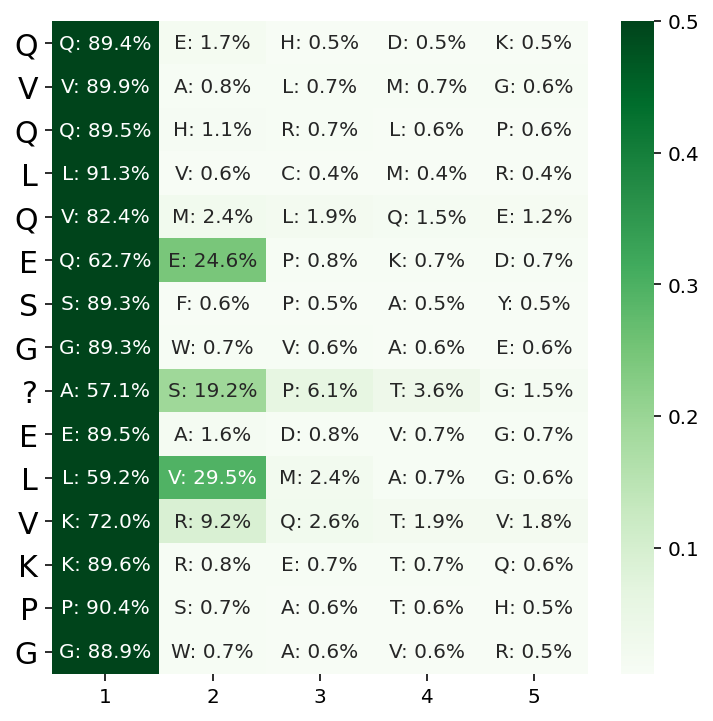

In [81]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(numbers2.iloc[:15,:5], annot=annot2.iloc[:15,:5], fmt='s', ax=ax, robust=True, vmax=0.5, cmap='Greens');
plt.yticks(rotation=0, fontsize=15);

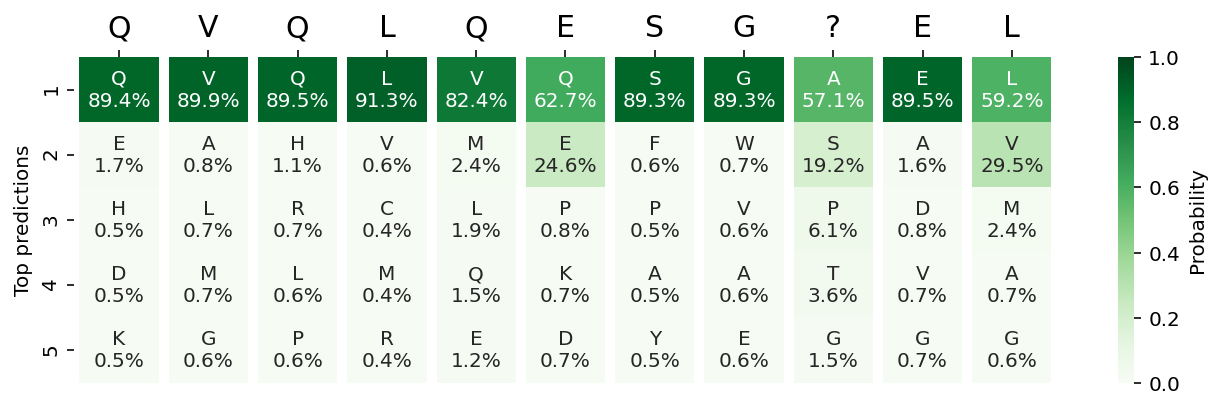

In [122]:
fig, ax = plt.subplots(figsize=(11, 3))
sns.heatmap(numbers2.iloc[:11,:5].T, annot=annot2.iloc[:11,:5].T, fmt='s', ax=ax, robust=True, vmax=1, vmin=0, cmap='Greens', cbar_kws={'label': 'Probability'});
for i in range(12):
    ax.axvline(i, color='white', lw=5)
ax.set_ylabel('Top predictions');
ax.xaxis.tick_top()
plt.xticks(rotation=0, fontsize=15);

In [124]:
example3 = pd.read_csv('/Users/prihodad/Downloads/example.csv', index_col=0)
example3.index = list('EVQILETG?GLVKPGGSLRLSCATSGFNFNDYFMNWVRQAPGKGLEWLAQMRNKNYQYGTYYAESLEGRVTVSRDDAKNSVYLQVSSLRAEDTAIYYCTRESYYGFTSYWGQGVMVTVSS')
example3.head()

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
E,0.004491,0.004009,0.009891,0.898808,0.003680,0.004789,0.003937,0.004317,0.005074,0.002496,0.004460,0.004112,0.003429,0.004879,0.002935,0.004042,0.003477,0.003188,0.003904,0.003886
V,0.006157,0.004106,0.004631,0.005952,0.004176,0.005296,0.004058,0.004252,0.004129,0.006555,0.007122,0.003864,0.003862,0.003486,0.003539,0.003160,0.003491,0.894072,0.004481,0.004047
Q,0.003378,0.003682,0.003671,0.004668,0.003365,0.003382,0.008101,0.003566,0.005704,0.004944,0.003748,0.004090,0.004848,0.901065,0.006622,0.003103,0.003612,0.003133,0.003853,0.003787
I,0.003594,0.004494,0.003745,0.004108,0.003796,0.003628,0.003990,0.015852,0.003511,0.874771,0.008053,0.004117,0.006601,0.004489,0.006143,0.003951,0.003764,0.011179,0.005563,0.003817
L,0.009473,0.004636,0.005974,0.008956,0.005896,0.008918,0.005996,0.007463,0.006352,0.287849,0.008180,0.005338,0.006137,0.004933,0.005320,0.005383,0.005667,0.570933,0.004929,0.004880


In [125]:
numbers3 = example3.T.reset_index(drop=True).T
numbers3 = numbers3.apply(lambda row: pd.Series(row.sort_values(ascending=False).values, row.index), axis=1)
numbers3.columns = numbers3.columns + 1
numbers3.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
E,0.898808,0.009891,0.005074,0.004879,0.004789,0.004491,0.004460,0.004317,0.004112,0.004042,0.004009,0.003937,0.003904,0.003886,0.003680,0.003477,0.003429,0.003188,0.002935,0.002496
V,0.894072,0.007122,0.006555,0.006157,0.005952,0.005296,0.004631,0.004481,0.004252,0.004176,0.004129,0.004106,0.004058,0.004047,0.003864,0.003862,0.003539,0.003491,0.003486,0.003160
Q,0.901065,0.008101,0.006622,0.005704,0.004944,0.004848,0.004668,0.004090,0.003853,0.003787,0.003748,0.003682,0.003671,0.003612,0.003566,0.003382,0.003378,0.003365,0.003133,0.003103
I,0.874771,0.015852,0.011179,0.008053,0.006601,0.006143,0.005563,0.004494,0.004489,0.004117,0.004108,0.003990,0.003951,0.003817,0.003796,0.003764,0.003745,0.003628,0.003594,0.003511
L,0.570933,0.287849,0.009473,0.008956,0.008918,0.008180,0.007463,0.006352,0.006137,0.005996,0.005974,0.005896,0.005667,0.005383,0.005338,0.005320,0.004933,0.004929,0.004880,0.004636


In [126]:
annot3 = example3.apply(lambda row: (row.sort_values(ascending=False).index + '\n' + row.sort_values(ascending=False).apply('{:.1%}'.format)).reset_index(drop=True), axis=1)
annot3.columns = annot3.columns + 1
annot3.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
E,E\n89.9%,D\n1.0%,K\n0.5%,Q\n0.5%,G\n0.5%,A\n0.4%,M\n0.4%,I\n0.4%,N\n0.4%,S\n0.4%,C\n0.4%,H\n0.4%,W\n0.4%,Y\n0.4%,F\n0.4%,T\n0.3%,P\n0.3%,V\n0.3%,R\n0.3%,L\n0.2%
V,V\n89.4%,M\n0.7%,L\n0.7%,A\n0.6%,E\n0.6%,G\n0.5%,D\n0.5%,W\n0.4%,I\n0.4%,F\n0.4%,K\n0.4%,C\n0.4%,H\n0.4%,Y\n0.4%,N\n0.4%,P\n0.4%,R\n0.4%,T\n0.3%,Q\n0.3%,S\n0.3%
Q,Q\n90.1%,H\n0.8%,R\n0.7%,K\n0.6%,L\n0.5%,P\n0.5%,E\n0.5%,N\n0.4%,W\n0.4%,Y\n0.4%,M\n0.4%,C\n0.4%,D\n0.4%,T\n0.4%,I\n0.4%,G\n0.3%,A\n0.3%,F\n0.3%,V\n0.3%,S\n0.3%
I,L\n87.5%,I\n1.6%,V\n1.1%,M\n0.8%,P\n0.7%,R\n0.6%,W\n0.6%,C\n0.4%,Q\n0.4%,N\n0.4%,E\n0.4%,H\n0.4%,S\n0.4%,Y\n0.4%,F\n0.4%,T\n0.4%,D\n0.4%,G\n0.4%,A\n0.4%,K\n0.4%
L,V\n57.1%,L\n28.8%,A\n0.9%,E\n0.9%,G\n0.9%,M\n0.8%,I\n0.7%,K\n0.6%,P\n0.6%,H\n0.6%,D\n0.6%,F\n0.6%,T\n0.6%,S\n0.5%,N\n0.5%,R\n0.5%,Q\n0.5%,W\n0.5%,Y\n0.5%,C\n0.5%


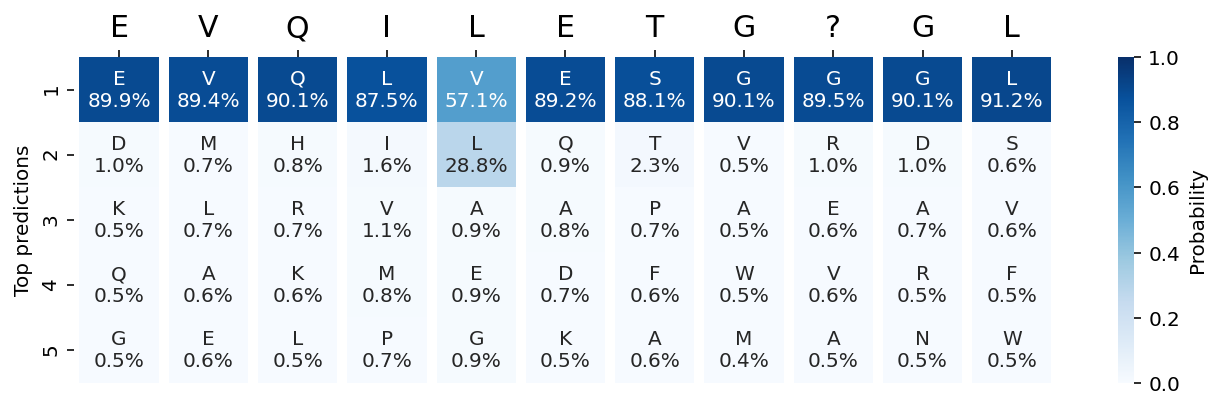

In [127]:
fig, ax = plt.subplots(figsize=(11, 3))
sns.heatmap(numbers3.iloc[:11,:5].T, annot=annot3.iloc[:11,:5].T, fmt='s', ax=ax, robust=True, vmax=1, vmin=0, cmap='Blues', cbar_kws={'label': 'Probability'});
for i in range(12):
    ax.axvline(i, color='white', lw=5)
ax.set_ylabel('Top predictions');
ax.xaxis.tick_top()
plt.xticks(rotation=0, fontsize=15);

# OASis stats

In [10]:
!ls ../../../../biophi/work/

OASis_9mers_v1.db    biophi-dev.merck.com input


In [11]:
engine = create_engine('sqlite:///../../../../biophi/work/OASis_9mers_v1.db', echo=False)

In [12]:
subjects = pd.read_sql_table('subjects', engine)
subjects.head()

,id,Subject,HeavySeqs,LightSeqs,CompleteHeavySeqs,CompleteLightSeqs,StudyPath,Author,Link,Year,Age,Disease,Vaccine,Isotype,BType,BSource,Processed
0,1,Bernat_2019:A007,423912,315778,390689,303913,Bernat_2019,"Bernat et al., (2019)",https://www.frontiersin.org/articles/10.3389/f...,2019,no,None,None,"Bulk, IGHM, IGHA, IGHG",Unsorted-B-Cells,PBMC,no
1,2,Bhiman_2015:CAP256,73793,114088,64256,108444,Bhiman_2015,"Bhiman et al., (2015)",https://www.ncbi.nlm.nih.gov/pubmed/26457756,2015,no,HIV,None,"Bulk, IGHA, IGHE, IGHG, IGHM",Unsorted-B-Cells,PBMC,None
2,3,Bonsignori_2016:CH505,58841,0,20507,0,Bonsignori_2016,"Bonsignori et al., (2016)",https://doi.org/10.1016/j.cell.2016.02.022,2016,no,"HIV, None",None,"Bulk, IGHE, IGHG, IGHD, IGHM","Unsorted-B-Cells, Memory-B-Cells",PBMC,None
3,4,Corcoran_2016:H1,457247,0,447879,0,Corcoran_2016,"Corcoran et al., (2016)",https://dx.doi.org/10.1038/ncomms13642,2016,no,None,None,"Bulk, IGHA, IGHG, IGHE, IGHD, IGHM",Unsorted-B-Cells,PBMC,None
4,5,Doria-Rose_2015:CAP256,168151,389774,117664,371998,Doria-Rose_2015,"Doria-Rose et al., (2015)",https://www.nature.com/articles/nature13036,2015,no,HIV,None,"Bulk, IGHE, IGHG, IGHM, IGHA, IGHD",Unsorted-B-Cells,PBMC,None


In [16]:
subject_isotypes = subjects['Isotype'].str.split(', ').apply(lambda v: pd.Series(True, v)).fillna(False)
subject_isotypes.head()

,Bulk,IGHM,IGHA,IGHG,IGHE,IGHD
0,True,True,True,True,False,False
1,True,True,True,True,True,False
2,True,True,False,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True


In [22]:
for k, v in subject_isotypes.sum().sort_values(ascending=False).items():
    print(f'{k} ({v} subjects)')

Bulk (227 subjects)
IGHM (218 subjects)
IGHG (214 subjects)
IGHA (197 subjects)
IGHD (169 subjects)
IGHE (60 subjects)


In [ ]:
engine.execute('SELECT SUM(CompleteHeavySeqs), SUM(CompleteLightSeqs) from subjects').fetchall()

In [4]:
63262721+55451148

118713869

# Export 152 seqs table

In [34]:
known_heavy = {r.id: str(r.seq) for r in iterate_fasta('../../data/tasks/humab_25_pairs/pairs/parental.fa') if r.description.endswith('VH')}
known_light = {r.id: str(r.seq) for r in iterate_fasta('../../data/tasks/humab_25_pairs/pairs/parental.fa') if r.description.endswith('VL')}

In [35]:
len(known_heavy)

25

In [ ]:
parental_heavy = {r.id: str(r.seq) for r in iterate_fasta('../../data/tasks/therapeutic_rediscovery/oas_cdr_hits/parental.fa') if r.description.endswith('VH')}
parental_light = {r.id: str(r.seq) for r in iterate_fasta('../../data/tasks/therapeutic_rediscovery/oas_cdr_hits/parental.fa') if r.description.endswith('VL')}

In [36]:
len(parental_heavy)

152

In [37]:
humanized_heavy = [r for r in iterate_fasta('../../data/tasks/therapeutic_rediscovery/thera/humanized.fa') if r.description.endswith('VH')]

humanized_light = [r for r in iterate_fasta('../../data/tasks/therapeutic_rediscovery/thera/humanized.fa') if r.description.endswith('VL')]

assert all([h.id == l.id for h, l in zip(humanized_heavy, humanized_light)])

In [38]:
len(humanized_heavy)

164

In [46]:
table = pd.DataFrame([{
    'Name': humanized_h.id,
    'VH Humanized': str(humanized_h.seq),
    'VL Humanized': str(humanized_l.seq),
    'VH Reconstructed Parental': parental_heavy.get(humanized_h.id),
    'VL Reconstructed Parental': parental_light.get(humanized_h.id),
    'VH Known Parental': known_heavy.get(humanized_h.id),
    'VL Known Parental': known_light.get(humanized_h.id),
} for humanized_h, humanized_l in zip(humanized_heavy, humanized_light)]).set_index('Name')

table = table.dropna(subset=['VH Reconstructed Parental', 'VL Reconstructed Parental'])

table = table.fillna('-')

table.head()

,VH Humanized,VL Humanized,VH Reconstructed Parental,VL Reconstructed Parental,VH Known Parental,VL Known Parental
Name,,,,,,
Abituzumab,QVQLQQSGGELAKPGASVKVSCKASGYTFSSFWMHWVRQAPGQGLE...,DIQMTQSPSSLSASVGDRVTITCRASQDISNYLAWYQQKPGKAPKL...,QVQLQQSGAELAKPGASVKLSCKASGYTFTSFWMHWVKQRPGQGLE...,DIQMTQTTSSLSASLGDRVTISCRASQDISNYLAWYQQKPDGTIKL...,-,-
Afutuzumab,QVQLVQSGAEVKKPGSSVKVSCKASGYAFSYSWINWVRQAPGQGLE...,DIVMTQTPLSLPVTPGEPASISCRSSKSLLHSNGITYLYWYLQKPG...,QVQLQQSGPELVKPGASVKISCKASGYAFSYSWINWVKQRPGQGLE...,DIVMTQAAFSNPVTLGTSASISCRSSKSLLHSNGITYLYWYLQKPG...,-,-
Alacizumab,EVQLVESGGGLVQPGGSLRLSCAASGFTFSSYGMSWVRQAPGKGLE...,DIQMTQSPSSLSASVGDRVTITCRASQDIAGSLNWLQQKPGKAIKR...,EVKLVESGGDLVKPGGSLKLSCAASGFTFSSYGMSWVRQTPDKRLE...,DIQMTQSPSSLSASLGERVSLTCRASQDIAGSLNWLQQEPDGTIKR...,-,-
Alemtuzumab,QVQLQESGPGLVRPSQTLSLTCTVSGFTFTDFYMNWVRQPPGRGLE...,DIQMTQSPSSLSASVGDRVTITCKASQNIDKYLNWYQQKPGKAPKL...,DVMLVESGGGLVQPGGSLSLSCAASGFTFTDFYMNWVRQPPGKALE...,DIKLIQSQASLSASLGETVTLTCKASQNIDKYLNWYQQKQGKSPKL...,-,-
Anrukinzumab,EVQLVESGGGLVQPGGSLRLSCAASGFTFISYAMSWVRQAPGKGLE...,DIQMTQSPSSLSASVGDRVTITCKASESVDNYGKSLMHWYQQKPGK...,EVQLVESGGGLVKLGGSLKLSCAASGFTFSSYAMSWVRQTPGKRLE...,DIVLTQSPASLAVSLGQRATISCKASESVDNYGKSLMHWYQQKPGQ...,-,-


In [47]:
table.to_excel('../../data/tasks/therapeutic_rediscovery/152_pairs_parental_sequences.xlsx')

In [41]:
len(table)

152

In [42]:
table.iloc[0]

VH Humanized                 QVQLQQSGGELAKPGASVKVSCKASGYTFSSFWMHWVRQAPGQGLE...
VL Humanized                 DIQMTQSPSSLSASVGDRVTITCRASQDISNYLAWYQQKPGKAPKL...
VH Reconstructed Parental    QVQLQQSGAELAKPGASVKLSCKASGYTFTSFWMHWVKQRPGQGLE...
VL Reconstructed Parental    DIQMTQTTSSLSASLGDRVTISCRASQDISNYLAWYQQKPDGTIKL...
VH Known Parental                                                         None
VL Known Parental                                                         None
Name: Abituzumab, dtype: object

In [44]:
len(table[~table['VH Known Parental'].isna()])

21